In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dg=pd.read_excel("/Users/surya/Downloads/Daily Grubs.xlsx")

In [3]:
dg=dg.iloc[:,0:43]

In [10]:
dg.drop([9430,7737],inplace=True)

In [ ]:
dg.info()

In [55]:
#Missing Values
dg.isnull().sum()

Address Details            1850
Amount Paid                  64
Balance Days Count           12
Breakfast Location del    12547
Cooking Partner            7537
Delivered Dates             159
Delivered Days Count          0
Delivery Charge              21
Dinner Location del       12434
Distance                     28
Distance-Home Chef         6932
Driver Name del               0
Driver User                2572
End Date                     17
Full Name                    17
Lunch Location del        11902
Meal Type                     8
Mode                         30
Package                    1606
Package del               10919
Packing                       0
Paid At date                145
Parent User                  18
Pause Dates               11781
Pause Days Count           1912
Pause Times Count          2600
Payment Status               22
Pin Code Details           1588
Locality                   1882
Plan Days                    14
Plan Pricing                 14
Quantity

# Month Calculations

## Date and Month Calculation

In [19]:
# Calculate the duration of the customer's relationship with the company
# Assuming you have 'Start Date' and 'End Date' columns
dg['Start Date'] = pd.to_datetime(dg['Start Date'])
dg['End Date'] = pd.to_datetime(dg['End Date'])
dg['Relationship Duration'] = (dg['End Date'] - dg['Start Date']).dt.days


In [48]:
#Calculating membership months
dg['membership']=dg['Relationship Duration']/30
dg['membership'].sort_values(ascending=False).head(30)

0.16666666666666666

In [152]:
# Extract the months and create a new column
dg['Start Month'] = dg['Start Date'].dt.month
dg['End Month'] = dg['End Date'].dt.month



In [434]:
dg['Month Year'] = dg['Start Date'].dt.strftime('%B %Y')  # Create a new column in the desired format
dg['Month Year']


0         March 2021
1         March 2021
2         March 2021
3         March 2021
4         March 2021
            ...     
12994    August 2023
12995            NaN
12996            NaN
12997    August 2023
12998            NaN
Name: Month Year, Length: 12997, dtype: object

### Relationship Duration

In [491]:


# Assuming you have a DataFrame named 'df' with columns: 'customer_name', 'meal_type', and 'relationship_duration'

# Create an empty dictionary to store the results
customer_longest_duration = {}

# Iterate through unique customer names
for customer_name in dg['Full Name'].unique():
    # Filter the DataFrame for the current customer
    customer_data = dg[dg['Full Name'] == customer_name]

    # Initialize variables to keep track of the longest duration and meal type
    longest_duration = 0
    longest_meal_type = None

    # Iterate through unique meal types for the current customer
    for meal_type in customer_data['Meal Type'].unique():
        # Filter the customer data for the current meal type
        meal_data = customer_data[customer_data['Meal Type'] == meal_type]

        # Calculate the total relationship duration for the current meal type
        total_duration = meal_data['Relationship Duration'].sum()

        # Check if this meal type has a longer duration
        if total_duration > longest_duration:
            longest_duration = total_duration
            longest_meal_type = meal_type

    # Store the result for the current customer in the dictionary
    customer_longest_duration[customer_name] = {'meal_type': longest_meal_type, 'duration': longest_duration}

# Create a DataFrame from the dictionary
result_df_mon = pd.DataFrame.from_dict(customer_longest_duration, orient='index')

# Print the result
print(result_df_mon)


                 meal_type  duration
DHEERAJ SHARMA      Dinner      91.0
Mala                 Lunch      84.0
Sree Harrish         Lunch     329.0
Thirumurugan        Dinner      37.0
Ganesh kumar         Lunch     463.0
...                    ...       ...
Vivek Raj        Breakfast       5.0
U Arumugam            None       0.0
Divakar             Dinner      29.0
Mani                  None       0.0
Suthadirakumar   Breakfast       6.0

[2768 rows x 2 columns]


In [492]:
result_df_mon.sort_values(by='duration',ascending=False)

,meal_type,duration
Deol Adhithia,Lunch,1015.0
Dhanapaul,Lunch,895.0
Ramagopalan,Lunch,796.0
Karthik abilash,Lunch,696.0
Balasundaram N,Lunch,670.0
...,...,...
Aishwariya Shanaya,None,0.0
Venkatasubramanian. K,None,0.0
Kalpana,None,0.0
Saravanan. D,None,0.0


In [494]:
result_df_mon['duration'].median()

6.0

### New & Existing Customer

In [501]:


# Assuming you have a DataFrame named 'df' with 'Month Year' and 'Full Name' columns
dg['Month Year'] = pd.to_datetime(dg['Month Year'], format='%B %Y', errors='coerce')


# Determine your criteria for new and existing customers
# For example, we'll assume that a new customer made their first purchase in a specific month
first_purchase_month = dg.groupby('Full Name')['Month Year'].min().reset_index()
first_purchase_month.rename(columns={'Month Year': 'First Purchase Month'}, inplace=True)
dfg = pd.merge(dg, first_purchase_month, on='Full Name', how='left')

dfg['Customer Type'] = dfg.apply(lambda row: 'New' if row['Month Year'] == row['First Purchase Month'] else 'Existing', axis=1)

# Group the data by 'Month Year' and 'Customer Type' and count the number of customers
customer_counts = dfg.groupby(['Month Year', 'Customer Type'])['Full Name'].nunique().reset_index()

# Convert 'Month Year' back to the desired format
customer_counts['Month Year'] = customer_counts['Month Year'].dt.strftime('%B %Y')

# Display the customer counts
print(customer_counts)


        Month Year Customer Type  Full Name
0       March 2021           New         14
1       April 2021      Existing          8
2       April 2021           New         47
3         May 2021      Existing         18
4         May 2021           New         77
5        June 2021      Existing         33
6        June 2021           New         47
7        July 2021      Existing         43
8        July 2021           New         24
9      August 2021      Existing         38
10     August 2021           New         54
11  September 2021      Existing         43
12  September 2021           New         48
13    October 2021      Existing         43
14    October 2021           New         52
15   November 2021      Existing         41
16   November 2021           New         50
17   December 2021      Existing         62
18   December 2021           New         57
19    January 2022      Existing         60
20    January 2022           New         74
21   February 2022      Existing

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'March 2021'),
  Text(1, 0, 'April 2021'),
  Text(2, 0, 'May 2021'),
  Text(3, 0, 'June 2021'),
  Text(4, 0, 'July 2021'),
  Text(5, 0, 'August 2021'),
  Text(6, 0, 'September 2021'),
  Text(7, 0, 'October 2021'),
  Text(8, 0, 'November 2021'),
  Text(9, 0, 'December 2021'),
  Text(10, 0, 'January 2022'),
  Text(11, 0, 'February 2022'),
  Text(12, 0, 'March 2022'),
  Text(13, 0, 'April 2022'),
  Text(14, 0, 'May 2022'),
  Text(15, 0, 'June 2022'),
  Text(16, 0, 'July 2022'),
  Text(17, 0, 'August 2022'),
  Text(18, 0, 'September 2022'),
  Text(19, 0, 'October 2022'),
  Text(20, 0, 'November 2022'),
  Text(21, 0, 'December 2022'),
  Text(22, 0, 'January 2023'),
  Text(23, 0, 'February 2023'),
  Text(24, 0, 'March 2023'),
  Text(25, 0, 'April 2023'),
  Text(26, 0, 'May 2023'),
  Text(27, 0, 'June 2023'),
  Text(28, 0, 'July 2023'),
  Text(

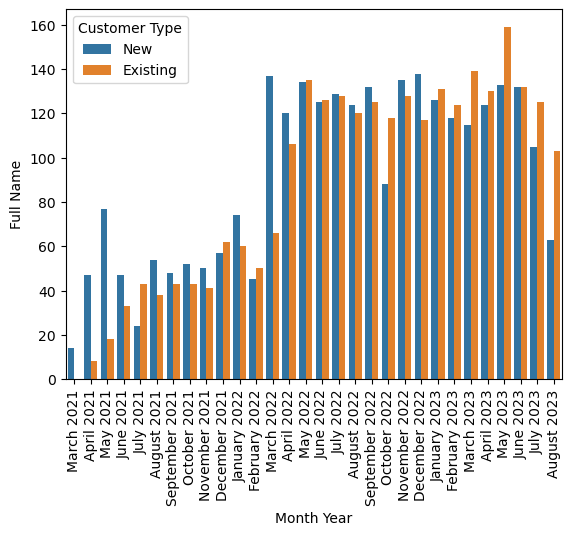

In [502]:
sns.barplot(x="Month Year",y="Full Name",hue="Customer Type",data=customer_counts)
plt.xticks(rotation=90)

# Revenue Calculation & Delivery Count Calculation

## Total Calculations

In [541]:
#Total Revenue
Total_revenue=dg['Total Amount'].sum()

In [526]:
#Total of delivered days count
Total_delivery_count=dg['Delivered Days Count'].sum()
del_count_per_customer = dg.groupby(['Full Name',])['Delivered Days Count'].sum().reset_index()

84168

In [243]:
# Calculating Total number of customer
cus_name=dg['Full Name'].nunique()
cus_name

2767

In [397]:
#Revenue Based on packagewise
package_rev=dg.groupby(['Package del','Meal Type'])['Total Amount'].sum().reset_index()

In [398]:
package_rev.sort_values(by='Total Amount',ascending=False)

,Package del,Meal Type,Total Amount
7,Premium Veg,Lunch,559635
12,Standard Veg,Dinner,492370
6,Premium Non - Veg,Lunch,465139
3,Economy Veg,Lunch,373916
0,Breakfast,Breakfast,256872
1,Economy Dinner Veg,Dinner,207287
9,Standard Non - Veg,Dinner,134322
2,Economy Non - Veg,Lunch,121337
8,Side Dish,Lunch,115376
5,Hybrid Veg,Lunch,13816


In [238]:
#Planwise Revenue
planwise_rev=dg.groupby(['Meal Type'])['Total Amount'].sum().reset_index()
planwise_rev

,Meal Type,Total Amount
0,Breakfast,1904554
1,Dinner,3064813
2,Lunch,6346497


In [237]:
planwise_rev_per=planwise_rev['Total Amount']/hpc*100
planwise_rev_per

0    16.830831
1    27.084216
2    56.084953
Name: Total Amount, dtype: object

In [183]:
#Locationwise Revenue
locality_rev=dg.groupby(['Locality'])['Total Amount'].sum().reset_index()

<Axes: xlabel='Total Amount', ylabel='Locality'>

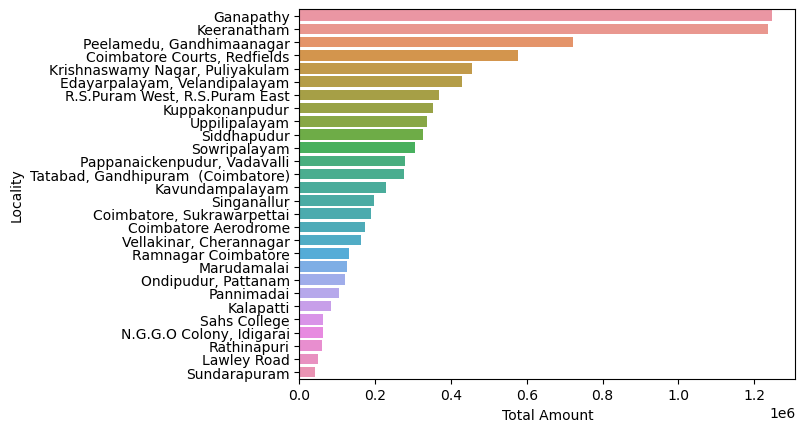

In [419]:
lvs=locality_rev.sort_values(by='Total Amount',ascending=False)

lvs1=lvs[(lvs['Total Amount']) > 40000]
sns.barplot(x='Total Amount',y='Locality',data=lvs1)

## Monthly revenue calculations

In [337]:
# Converting 'Month Year' column to date format
dg['Month Year'] = pd.to_datetime(dg['Month Year'], format='%B %Y')

month_rev = dg.groupby(['Month Year'])['Total Amount'].sum().reset_index()

# Sort the DataFrame by the 'Month Year' column
month_rev = month_rev.sort_values(by='Month Year')

# Convert 'Month Year' back to the desired format
month_rev['Month Year'] = month_rev['Month Year'].dt.strftime('%B %Y')


In [536]:
month_rev.sort_values(by='Total Amount',ascending=False)

,Month Year,Total Amount
17,August 2022,593434
28,July 2023,549603
14,May 2022,530830
18,September 2022,524689
27,June 2023,519247
26,May 2023,516423
16,July 2022,513579
20,November 2022,507852
23,February 2023,495678
21,December 2022,459553


In [510]:
month_rev.mean()

/var/folders/z8/bn08xxkn59vf8m8163fd09pw0000gn/T/ipykernel_4594/1537772561.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  month_rev.mean()


Total Amount    377195.466667
dtype: float64

In [539]:
month_rev[month_rev['Total Amount'] >= 377195].count()

Month Year      18
Total Amount    18
dtype: int64

In [512]:
month_rev.count()

Month Year      30
Total Amount    30
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'March 2021'),
  Text(1, 0, 'April 2021'),
  Text(2, 0, 'May 2021'),
  Text(3, 0, 'June 2021'),
  Text(4, 0, 'July 2021'),
  Text(5, 0, 'August 2021'),
  Text(6, 0, 'September 2021'),
  Text(7, 0, 'October 2021'),
  Text(8, 0, 'November 2021'),
  Text(9, 0, 'December 2021'),
  Text(10, 0, 'January 2022'),
  Text(11, 0, 'February 2022'),
  Text(12, 0, 'March 2022'),
  Text(13, 0, 'April 2022'),
  Text(14, 0, 'May 2022'),
  Text(15, 0, 'June 2022'),
  Text(16, 0, 'July 2022'),
  Text(17, 0, 'August 2022'),
  Text(18, 0, 'September 2022'),
  Text(19, 0, 'October 2022'),
  Text(20, 0, 'November 2022'),
  Text(21, 0, 'December 2022'),
  Text(22, 0, 'January 2023'),
  Text(23, 0, 'February 2023'),
  Text(24, 0, 'March 2023'),
  Text(25, 0, 'April 2023'),
  Text(26, 0, 'May 2023'),
  Text(27, 0, 'June 2023'),
  Text(28, 0, 'July 2023'),
  Text(

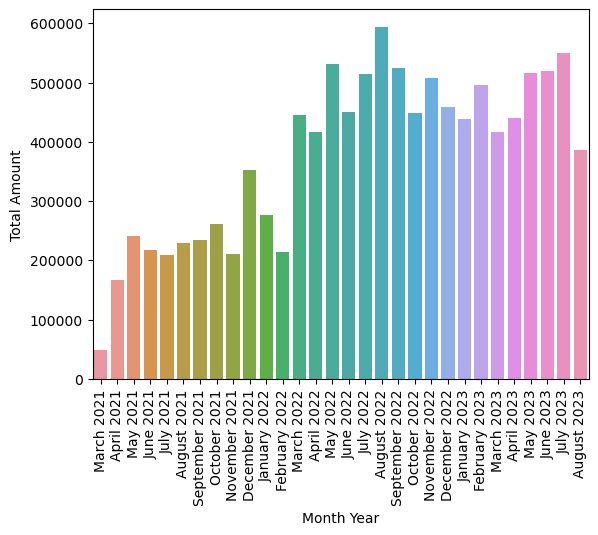

In [463]:
sns.barplot(x=month_rev['Month Year'],y=month_rev['Total Amount'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'March 2021'),
  Text(1, 0, 'April 2021'),
  Text(2, 0, 'May 2021'),
  Text(3, 0, 'June 2021'),
  Text(4, 0, 'July 2021'),
  Text(5, 0, 'August 2021'),
  Text(6, 0, 'September 2021'),
  Text(7, 0, 'October 2021'),
  Text(8, 0, 'November 2021'),
  Text(9, 0, 'December 2021'),
  Text(10, 0, 'January 2022'),
  Text(11, 0, 'February 2022'),
  Text(12, 0, 'March 2022'),
  Text(13, 0, 'April 2022'),
  Text(14, 0, 'May 2022'),
  Text(15, 0, 'June 2022'),
  Text(16, 0, 'July 2022'),
  Text(17, 0, 'August 2022'),
  Text(18, 0, 'September 2022'),
  Text(19, 0, 'October 2022'),
  Text(20, 0, 'November 2022'),
  Text(21, 0, 'December 2022'),
  Text(22, 0, 'January 2023'),
  Text(23, 0, 'February 2023'),
  Text(24, 0, 'March 2023'),
  Text(25, 0, 'April 2023'),
  Text(26, 0, 'May 2023'),
  Text(27, 0, 'June 2023'),
  

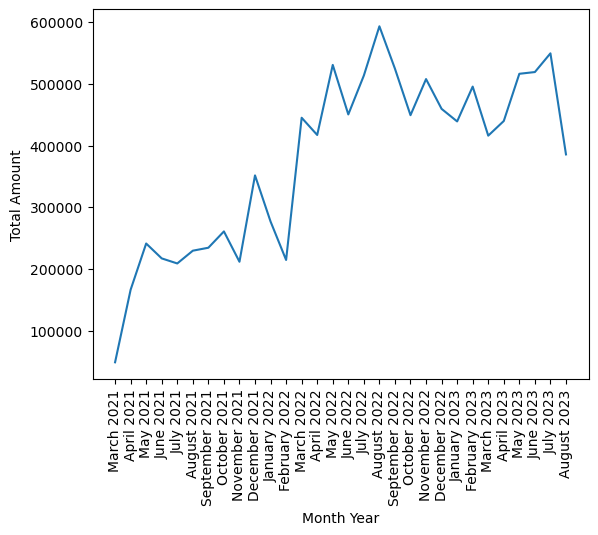

In [339]:
sns.lineplot(x=month_rev['Month Year'],y=month_rev['Total Amount'])
plt.xticks(rotation=90)

### Monthly delivery counts

In [534]:
delivery_count_month=dg.groupby(['Month Year'])['Delivered Days Count'].sum().reset_index()

In [535]:
delivery_count_month.sort_values(by='Delivered Days Count',ascending=False)

,Month Year,Delivered Days Count
17,2022-08-01,4610
14,2022-05-01,4435
18,2022-09-01,3921
16,2022-07-01,3898
26,2023-05-01,3675
27,2023-06-01,3626
12,2022-03-01,3618
15,2022-06-01,3609
13,2022-04-01,3579
20,2022-11-01,3575


In [195]:
#Planwise delivery count days
planwise_del=dg.groupby(['Meal Type'])['Delivered Days Count'].sum().reset_index()

In [200]:
planwise_del

,Meal Type,Delivered Days Count
0,Breakfast,15386
1,Dinner,22528
2,Lunch,46254


In [178]:
#Locationwise count of delivered days
locality_del=dg.groupby(['Locality'])['Delivered Days Count'].sum().reset_index()

In [180]:
locality_del.sort_values(by='Delivered Days Count',ascending=False)

,Locality,Delivered Days Count
6,Ganapathy,9207
11,Keeranatham,8175
23,"Peelamedu, Gandhimaanagar",5343
2,"Coimbatore Courts, Redfields",4357
13,"Krishnaswamy Nagar, Puliyakulam",3103
5,"Edayarpalayam, Velandipalayam",3061
25,"R.S.Puram West, R.S.Puram East",3004
14,Kuppakonanpudur,2879
38,Uppilipalayam,2548
33,Sowripalayam,2540


### Skip days count

In [531]:
dg['Skip Days Count'].sum()

5211

In [537]:
skipdays_count_month=dg.groupby(['Month Year'])['Skip Days Count'].sum().reset_index()
skipdays_count_month.sort_values(by='Skip Days Count',ascending=False)

,Month Year,Skip Days Count
14,2022-05-01,339
12,2022-03-01,331
15,2022-06-01,289
13,2022-04-01,277
18,2022-09-01,263
16,2022-07-01,252
17,2022-08-01,250
26,2023-05-01,242
9,2021-12-01,240
20,2022-11-01,204


In [199]:
planwise_skip=dg.groupby(['Meal Type'])['Skip Days Count'].sum().reset_index()

In [201]:
planwise_skip

,Meal Type,Skip Days Count
0,Breakfast,659
1,Dinner,1661
2,Lunch,2891


### Per Customer Calculations

In [ ]:
# Group by 'Full Name' and calculate total revenue per customer
revenue_per_customer = dg.groupby(['Full Name'])['Total Amount'].sum().reset_index()

In [132]:
revenue_per_customer.sort_values(by='Total Amount',ascending=False).head(30)

,Full Name,Total Amount
971,Kannammal,191197
322,Balasundaram N,159453
1780,Ramagopalan,138175
880,Jeyakumar P,116346
2462,Urmila,116112
2191,Sivakumar,113646
995,Karthik abilash,107055
1672,RAJA,99555
1563,Pradeep shagar,98222
1225,Manjunathan,95026


(array([   0,    1,    2, ..., 2764, 2765, 2766]),
 [Text(0, 0, ' Akila'),
  Text(1, 0, ' N kannan'),
  Text(2, 0, ' v. Rajkumar '),
  Text(3, 0, 'A Kasinathan '),
  Text(4, 0, 'A M RAJARAM'),
  Text(5, 0, 'A P Senthil Kumar'),
  Text(6, 0, 'A SANJEEVAN'),
  Text(7, 0, 'A SRIDEVI '),
  Text(8, 0, 'A Sanjeevan'),
  Text(9, 0, 'A. R. Venkatapathy'),
  Text(10, 0, 'A. Ram Subraja '),
  Text(11, 0, 'A.CHITRA'),
  Text(12, 0, 'A.Chandramohan'),
  Text(13, 0, 'A.VENKATESH'),
  Text(14, 0, 'A.Varadarajan'),
  Text(15, 0, 'ABINESH BALDEV SINGH'),
  Text(16, 0, 'AISHWARYA SENTHILKUMAR'),
  Text(17, 0, 'AJITHKUMAR'),
  Text(18, 0, 'AMARNATH MS'),
  Text(19, 0, 'AMUDHA DEVARAJ'),
  Text(20, 0, 'ANANDARAJAN'),
  Text(21, 0, 'ANGU RAGUL RAJ '),
  Text(22, 0, 'ANTONY RENNINGTON'),
  Text(23, 0, 'ARSHIYA KHAN'),
  Text(24, 0, 'ARUL PRASAD MK'),
  Text(25, 0, 'ARULJAYASAKTHI '),
  Text(26, 0, 'ARUN KUMAR J R'),
  Text(27, 0, 'ARUN TR'),
  Text(28, 0, 'ARUN VANGILI'),
  Text(29, 0, 'ARUNACHALAM'),
  Te

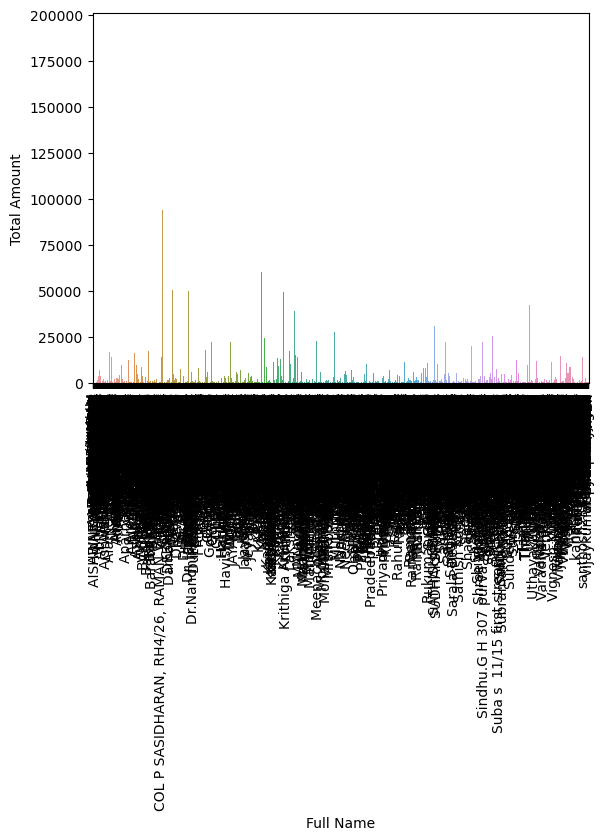

In [329]:
sns.barplot(x=revenue_per_customer['Full Name'],y=revenue_per_customer['Total Amount'])
plt.xticks(rotation=90)

In [227]:
rev_percent=revenue_per_customer['Total Amount']/Total_revenue*100

In [143]:
#Calculate revenue per customer mealtypewise
revenue_meal_customer = dg.groupby(['Full Name','Meal Type'])['Total Amount'].sum().reset_index()

In [144]:
revenue_meal_customer.sort_values(by='Total Amount',ascending=False).head(30)

,Full Name,Meal Type,Total Amount
1306,Jeyakumar P,Dinner,97143
2496,RAJA,Dinner,96988
473,Balasundaram N,Lunch,80503
1438,Kannammal,Breakfast,78654
1480,Karthik abilash,Lunch,72396
651,Deepak,Lunch,71640
3272,Sivakumar,Lunch,64651
471,Balasundaram N,Breakfast,60673
1440,Kannammal,Lunch,59905
697,Dhanapaul,Lunch,57364


<Axes: xlabel='Full Name', ylabel='Total Amount'>

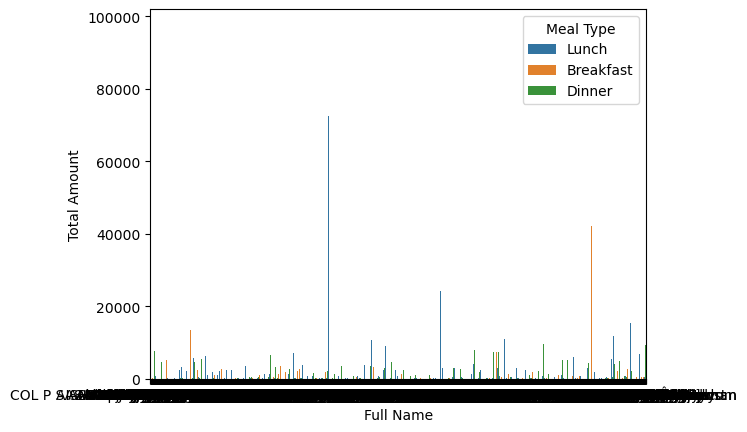

In [470]:
sns.barplot(x="Full Name",y="Total Amount",hue="Meal Type",data=revenue_meal_customer)

In [156]:
#Dinner customerwise revenue
dinner = dg[(dg['Meal Type'] == 'Dinner')].groupby(['Full Name'])['Total Amount'].sum().reset_index()

In [155]:
#Lunch Customerwise Revenue
lunch = dg[(dg['Meal Type'] == 'Lunch')].groupby(['Full Name'])['Total Amount'].sum().reset_index()

In [386]:
#Breakfast Customerwise Revenue
breakfast = dg[(dg['Meal Type'] == 'Breakfast')].groupby(['Full Name'])['Total Amount'].sum().reset_index()

,Full Name,Total Amount
0,N kannan,1750
1,v. Rajkumar,2603
2,A P Senthil Kumar,1093
3,A SANJEEVAN,13330
4,A Sanjeevan,1775
...,...,...
845,sudalaimuthu,544
846,sujatha,538
847,surendran,562
848,v.saravanan,1082


## Plan pricing changes

In [307]:
#Change in Plan Pricing
# Convert 'Start Date' and 'Package del' to datetime objects
dg['Start Date'] = pd.to_datetime(dg['Start Date'])


# Get a list of unique packages in the dataset
unique_packages = dg['Package del'].unique()

# Create an empty DataFrame to store the results
price_changes_df = pd.DataFrame(columns=['Package', 'Month', 'Price Change'])

# Iterate through each unique package
for package in unique_packages:
    # Create a copy of the original DataFrame
    package_df = dg[dg['Package del'] == package].copy()

    # Extract the month and year from 'Start Date'
    package_df['Month'] = package_df['Start Date'].dt.strftime('%B %Y')

    # Convert 'Month' to datetime and sort the DataFrame
    package_df['Month'] = pd.to_datetime(package_df['Month'], format='%B %Y')
    package_df = package_df.sort_values(by='Month')

    # Group the data by 'Package del' and the month
    average_price_by_month = package_df[(package_df['Plan Days'] == 'Monthly')].groupby(['Package del', 'Month'])['Plan Pricing'].mean()

    # Calculate price changes
    price_changes = average_price_by_month.diff()

    # Reset the index of the Series
    price_changes = price_changes.reset_index()

    # Create a DataFrame with the results for this package
    result_df = pd.DataFrame({
        'Package': [package] * len(price_changes),
        'Month': price_changes['Month'],
        'Price Change': price_changes['Plan Pricing']
    })

    # Append the results to the main DataFrame
    price_changes_df = pd.concat([price_changes_df, result_df], ignore_index=True)

# Display the DataFrame with price changes for all plans
print(price_changes_df)


               Package      Month  Price Change
0         Standard Veg 2021-03-01           NaN
1         Standard Veg 2021-04-01   -412.500000
2         Standard Veg 2021-05-01     10.000000
3         Standard Veg 2021-06-01    139.000000
4         Standard Veg 2021-07-01      0.000000
..                 ...        ...           ...
118  Economy Non - Veg 2021-11-01      0.000000
119  Economy Non - Veg 2021-12-01      0.000000
120  Economy Non - Veg 2022-01-01      0.000000
121  Economy Non - Veg 2022-02-01     86.666667
122  Economy Non - Veg 2022-09-01    253.333333

[123 rows x 3 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Standard Veg'),
  Text(1, 0, 'Premium Non - Veg'),
  Text(2, 0, 'Standard Non - Veg'),
  Text(3, 0, 'Side Dish'),
  Text(4, 0, 'Premium Veg'),
  Text(5, 0, 'Hybrid Veg'),
  Text(6, 0, 'Hybrid Non - Veg'),
  Text(7, 0, 'Economy Veg'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Economy Dinner Veg'),
  Text(10, 0, 'Economy Non - Veg')])

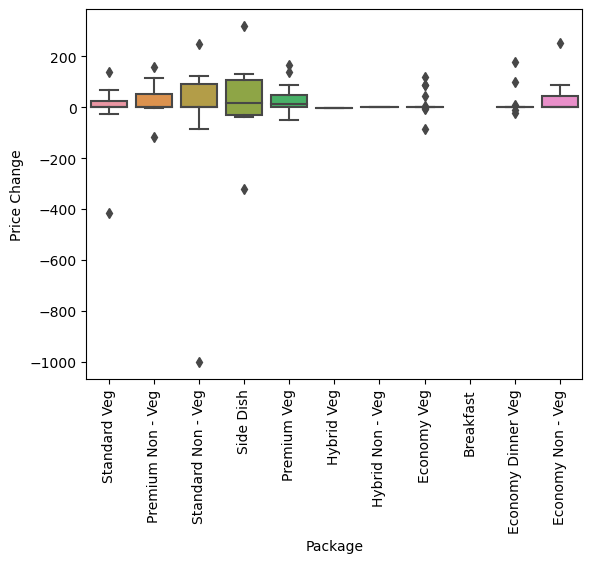

In [469]:
sns.boxplot(x=price_changes_df['Package'],y=price_changes_df['Price Change'])
plt.xticks(rotation=90)

# Customer Life Time Value Calculation

### Average Order value 

In [583]:
#AVERAGE ORDER VALUE

# Replace zero values with NaN in 'Delivered Days Count'
del_count_per_customer['Delivered Days Count'] = del_count_per_customer['Delivered Days Count'].replace(0, np.nan)

daily_grubs = revenue_per_customer[['Full Name', 'Total Amount']].merge(del_count_per_customer[['Full Name', 'Delivered Days Count']], on='Full Name')
daily_grubs['Average Order Value'] = daily_grubs['Total Amount'] / daily_grubs['Delivered Days Count']



### Purchase Frequency

In [544]:
#Calculating PURCHASE FREQUENCY
purchase_frequency=Total_delivery_count/cus_name
purchase_frequency

### Repeat rate / Churn rate

In [552]:
#Calculating repeat rate
# Group by 'Unique ID' and calculate the number of unique orders for each customer
repeat_customers1 = dg.groupby('Full Name')['Start Date'].count().reset_index()

# Count the total number of unique customers
total_customers1 = len(dg['Full Name'].unique())

# Calculate the number of repeat customers and the repeat rate
num_repeat_customers = (repeat_customers1['Start Date'] > 1).sum()
repeat_rate1 = num_repeat_customers / total_customers1

print("Total Customers:", total_customers1)
print("Number of Repeat Customers:", num_repeat_customers)
print("Repeat Rate:", repeat_rate1)


Total Customers: 2768
Number of Repeat Customers: 1524
Repeat Rate: 0.5505780346820809


In [555]:
#Calculating Churn rate
churn_rate=1-repeat_rate1
churn_rate*100

44.942196531791915

### Profit Margin

In [569]:
#Calculating profit margin from plan pricing
dg['Amount']=dg['Plan Pricing']*dg['Quantity']

dg['Profit Margin']=dg['Amount']*0.3

#Grouping Profit Margin by customer
dg_pm=dg.groupby(['Full Name',])['Profit Margin'].sum().reset_index()

# Merge the profit margin on the 'Full Name' column with cltv calculation dataframe
daily_grubs_final = pd.merge(daily_grubs, dg_pm, on='Full Name')

### CLV

In [ ]:
daily_grubs_final['clv']=(daily_grubs_final['Average Order Value']*purchase_frequency)/churn_rate

### CLTV

In [587]:
daily_grubs_final['cltv']=daily_grubs_final['clv']*daily_grubs_final['Profit Margin']

In [589]:
daily_grubs_final

,Full Name,Total Amount,Delivered Days Count,Average Order Value,Profit Margin,clv,cltv
0,Akila,241,1.0,241.0,66.0,16311.751495,1076575.598651
1,N kannan,5673,23.0,246.652174,1423.2,16694.311064,23759343.506725
2,v. Rajkumar,2774,26.0,106.692308,606.0,7221.321201,4376120.647888
3,A Kasinathan,1355,7.0,193.571429,291.9,13101.614271,3824361.205731
4,A M RAJARAM,141,1.0,141.0,31.5,9543.389879,300616.781177
...,...,...,...,...,...,...,...
2762,velmurugan,6498,54.0,120.333333,1572.3,8144.595145,12805746.945948
2763,vijaykumar padmanabhan,15785,122.0,129.385246,3543.9,8757.26132,31034858.393551
2764,vishnu prasaanth,238,2.0,119.0,59.4,8054.350323,478428.409193
2765,vivek,125,1.0,125.0,27.0,8460.45202,228432.204542


### Packages in meal type

In [522]:
#breakfast Packages
breakfast1 = dg[(dg['Meal Type'] == 'Breakfast')].groupby(['Package del'])['Total Amount'].sum().reset_index()

In [523]:
breakfast1

,Package del,Total Amount
0,Breakfast,256872
1,Standard Veg,2359


In [517]:
#Lunch Packages
lunch1 = dg[(dg['Meal Type'] == 'Lunch')].groupby(['Package del'])['Total Amount'].sum().reset_index()

In [524]:
lunch1.sum()

Package del     Economy Non - VegEconomy VegHybrid Non - VegHy...
Total Amount                                              1660389
dtype: object

In [520]:
#Dinner Packages
dinner1 = dg[(dg['Meal Type'] == 'Dinner')].groupby(['Package del'])['Total Amount'].sum().reset_index()

In [521]:
dinner1

,Package del,Total Amount
0,Economy Dinner Veg,207287
1,Standard Non - Veg,134322
2,Standard Veg,492370


## Conversions

### Trial to Monthly

In [ ]:
# Filter customers with 'Trial' and 'Monthly' plans
selected_customers = dg[dg['Plan Days'].isin(['Trial', 'Monthly'])]

# Count the number of 'Trial' plans for each customer
trial_counts = selected_customers[selected_customers['Plan Days'] == 'Trial'].groupby('Full Name')['Plan Days'].count()

# Count the number of 'Monthly' plans for each customer
monthly_counts = selected_customers[selected_customers['Plan Days'] == 'Monthly'].groupby('Full Name')['Plan Days'].count()

# Filter customers with more than one 'Trial' plan and at least one 'Monthly' plan
selected_customers = selected_customers[selected_customers['Full Name'].isin(trial_counts[trial_counts > 1].index) & selected_customers['Full Name'].isin(monthly_counts[monthly_counts >= 1].index)]

# Count the number of customers meeting the condition
count_of_customers = len(selected_customers['Full Name'].unique())

print(f"Number of customers with more than one Trial and at least one Monthly plan: {count_of_customers}")


### Weekly to Monthly

In [ ]:
dg['Plan Days'] == 'Monthly'.count()

In [ ]:
dg['Plan Days'] == 'Weekly'.count()

In [ ]:
dg['Plan Days'] == 'Trial'.count()

In [618]:
# Filter customers with 'Weekly' and 'Monthly' plans
selected_customers1 = dg[dg['Plan Days'].isin(['Weekly', 'Monthly'])]

# Count the number of 'Trial' plans for each customer
weekly_counts = selected_customers1[selected_customers1['Plan Days'] == 'Weekly'].groupby('Full Name')['Plan Days'].count()


# Count the number of 'Monthly' plans for each customer
monthly_counts1 = selected_customers1[selected_customers1['Plan Days'] == 'Monthly'].groupby('Full Name')['Plan Days'].count()


# Filter customers with more than one 'Trial' plan and at least one 'Monthly' plan
selected_customers1 = selected_customers1[selected_customers1['Full Name'].isin(weekly_counts[weekly_counts > 1].index) & selected_customers1['Full Name'].isin(monthly_counts1[monthly_counts1 >= 1].index)]

# Count the number of customers meeting the condition
count_of_customers1 = len(selected_customers1['Full Name'].unique())

print(f"Number of customers with more than one Weekly and at least one Monthly plan: {count_of_customers1}")





Number of customers with more than one Weekly and at least one Monthly plan: 206


### Trial to Weekly 

In [620]:
# Filter customers with 'Weekly' and 'Monthly' plans
selected_customers2 = dg[dg['Plan Days'].isin(['Trial', 'Weekly'])]

# Count the number of 'Trial' plans for each customer
trial_counts1 = selected_customers2[selected_customers2['Plan Days'] == 'Trial'].groupby('Full Name')['Plan Days'].count()


# Count the number of 'Monthly' plans for each customer
weekly_counts1 = selected_customers2[selected_customers2['Plan Days'] == 'Weekly'].groupby('Full Name')['Plan Days'].count()


# Filter customers with more than one 'Trial' plan and at least one 'Monthly' plan
selected_customers3 = selected_customers2[selected_customers2['Full Name'].isin(trial_counts1[trial_counts1 > 1].index) & selected_customers2['Full Name'].isin(weekly_counts1[weekly_counts1 >= 1].index)]

# Count the number of customers meeting the condition
count_of_customers2 = len(selected_customers3['Full Name'].unique())

print(f"Number of customers with more than one Trial and at least one Weekly plan: {count_of_customers2}")

Number of customers with more than one Trial and at least one Weekly plan: 266


In [547]:


# Assuming you have a DataFrame df with the 'Full Name' column
# and you want to calculate the repeat rate for each customer
customer_counts = dg['Full Name'].value_counts()

# Calculate the repeat rate
repeat_rate = customer_counts / len(dg) * 100

# Create a new DataFrame to display the results
repeat_rate_df = pd.DataFrame({'Customer Name': customer_counts.index, 'Repeat Count': customer_counts, 'Repeat Rate (%)': repeat_rate})

# Display the repeat rate for each customer
print(repeat_rate_df)


                       Customer Name  Repeat Count  Repeat Rate (%)
Vishnu Shanmugar   Vishnu Shanmugar            319         2.454413
Balasundaram N        Balasundaram N           223         1.715781
Kannammal                  Kannammal           149         1.146418
Rathnasabapathy      Rathnasabapathy           124         0.954066
Sudharsan                 Sudharsan            105         0.807879
...                              ...           ...              ...
Meenakshi                 Meenakshi              1         0.007694
Mathangi                    Mathangi             1         0.007694
Nitish A                    Nitish A             1         0.007694
A.VENKATESH              A.VENKATESH             1         0.007694
Suthadirakumar       Suthadirakumar              1         0.007694

[2767 rows x 3 columns]


In [550]:
# Assuming you have a DataFrame named 'df' with a 'Unique ID' column
# Calculate the number of unique IDs and the total number of rows
total_records = len(dg)
unique_name = dg['Full Name'].nunique()

# Calculate the number of repeated entries
repeated_entries = total_records - unique_name

# Calculate the repeat rate
repeat_rate = (repeated_entries / total_records) * 100  # as a percentage

print(f"Total Records: {total_records}")
print(f"Unique IDs: {unique_name}")
print(f"Repeated Entries: {repeated_entries}")
print(f"Repeat Rate: {repeat_rate:.2f}%")


Total Records: 12997
Unique IDs: 2767
Repeated Entries: 10230
Repeat Rate: 78.71%


In [446]:
mm1=dg[dg['Meal Type'] == 'Breakfast'].groupby(['Full Name'])['Relationship Duration'].sum().reset_index()
mm1.sort_values(by= 'Relationship Duration',ascending=False).head(30)

,Full Name,Relationship Duration
94,Balasundaram N,609.0
538,Ramagopalan,548.0
658,Sivakumar,520.0
233,Jagadesan,515.0
285,Kannammal,510.0
743,Urmila,452.0
113,Chandra,436.0
387,Mrs Santha Manivannan,418.0
295,Karthik abilash,354.0
571,"S,Chinnasamy",331.0


In [443]:
mm2 = dg[dg['Meal Type'] == 'Lunch'].groupby(['Full Name'])['Relationship Duration'].sum().reset_index()
mm2.sort_values(by= 'Relationship Duration',ascending=False).head(30)

,Full Name,Relationship Duration
344,Deol Adhithia,1015.0
360,Dhanapaul,895.0
1400,Ramagopalan,796.0
774,Karthik abilash,696.0
244,Balasundaram N,670.0
649,Janarthanan D,657.0
1811,Sudharsan,611.0
1230,Pradeep shagar,558.0
1719,Sivakumar,553.0
1041,Mrs Santha Manivannan,551.0


In [458]:
mm.median()

/var/folders/z8/bn08xxkn59vf8m8163fd09pw0000gn/T/ipykernel_4594/4223209310.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mm.median()


Relationship Duration    6.0
dtype: float64

In [457]:
mm.sort_values(by='Relationship Duration',ascending=True)

,Full Name,Meal Type,Relationship Duration
1544,Kavitha Rajendran,Lunch,-41.0
3575,Syed Hassan,Lunch,-12.0
1998,Muruganandam,Lunch,-11.0
3966,Vishalini,Lunch,-9.0
3965,Vishalini,Dinner,-8.0
...,...,...,...
1480,Karthik abilash,Lunch,696.0
2660,Ramagopalan,Dinner,726.0
2661,Ramagopalan,Lunch,796.0
697,Dhanapaul,Lunch,895.0


In [516]:
aug_sale=dg[dg['Month Year'] == '2022-08-01' ].groupby(['Package del'])['Total Amount'].sum().reset_index()
aug_sale

,Package del,Total Amount
0,Breakfast,2368
1,Economy Veg,2620
2,Premium Non - Veg,3659
3,Side Dish,1242


In [513]:
dg['Month Year']

0       2021-03-01
1       2021-03-01
2       2021-03-01
3       2021-03-01
4       2021-03-01
           ...    
12994   2023-08-01
12995          NaT
12996          NaT
12997   2023-08-01
12998          NaT
Name: Month Year, Length: 12997, dtype: datetime64[ns]

In [371]:
membership_months=dg.groupby(['Full Name','Meal Type'])['membership'].sum().reset_index()


In [372]:
membership_months.sort_values(by= 'membership',ascending=False).head(50)

,Full Name,Meal Type,membership
667,Deol Adhithia,Lunch,33.833333
697,Dhanapaul,Lunch,29.833333
2661,Ramagopalan,Lunch,26.533333
2660,Ramagopalan,Dinner,24.200000
1480,Karthik abilash,Lunch,23.200000
473,Balasundaram N,Lunch,22.333333
1233,Janarthanan D,Lunch,21.900000
2329,Pradeep shagar,Dinner,21.466667
3444,Sudharsan,Lunch,20.366667
471,Balasundaram N,Breakfast,20.300000


In [385]:

filtered_mm = mm[mm['Relationship Duration'] <= 28]
filtered_mm

,Full Name,Relationship Duration
0,Akila,0.0
1,N kannan,18.0
2,v. Rajkumar,28.0
3,A Kasinathan,20.0
4,A M RAJARAM,0.0
...,...,...
2760,vasanthkumar L,0.0
2761,vedhanarayanan,0.0
2764,vishnu prasaanth,0.0
2765,vivek,0.0


In [51]:
dg.to_csv('full_grubs.csv',index=False)

In [60]:
dg[['Full Name','Package del','Relationship Duration']].sort_values(by= 'Relationship Duration',ascending=False)

,Full Name,Package del,Relationship Duration
1932,Janarthanan D,NaN,521.0
1401,Sri Sai Sandeep,Standard Veg,367.0
5413,Deol Adhithia,NaN,342.0
5412,Deol Adhithia,NaN,342.0
6370,Abinaya,NaN,316.0
...,...,...,...
12984,NaN,NaN,NaN
12993,NaN,NaN,NaN
12995,NaN,NaN,NaN
12996,NaN,NaN,NaN


In [73]:
dg[['Full Name','Meal Type','Total Amount']].sort_values(by= 'Total Amount',ascending=False)

,Full Name,Meal Type,Total Amount
1945,La Cafe,Lunch,17028
1331,La cafe,Lunch,14149
1324,Suriya,Dinner,14149
5930,RAJA,Dinner,12930
5232,RAJA,Dinner,12800
...,...,...,...
12993,NaN,Breakfast,NaN
12994,Mani,Breakfast,NaN
12995,NaN,Breakfast,NaN
12996,NaN,Breakfast,NaN


In [447]:
#Customer Revenue meal type and Packagewise
cr=dg.groupby(['Full Name','Meal Type','Package del'])['Total Amount'].sum().reset_index().sort_values(by='Total Amount',ascending=False).head(50)
cr

,Full Name,Meal Type,Package del,Total Amount
489,Pradeep shagar,Lunch,Premium Non - Veg,55317
160,Dhanapaul,Lunch,Economy Veg,36645
703,Sudharsan,Lunch,Premium Veg,31322
102,Balasundaram N,Lunch,Premium Veg,29724
292,Jeyakumar P,Dinner,Standard Veg,27728
689,Stella Kingsly,Lunch,Premium Non - Veg,27179
377,Logeswaran,Lunch,Premium Veg,25085
86,Badraraju,Lunch,Premium Veg,23983
334,Karthik abilash,Lunch,Premium Non - Veg,23854
561,Rathnasabapathy,Lunch,Premium Veg,23532


In [390]:
package_percent = (package_rev['Total Amount'] / hpc) * 100
package_percent


0     2.270017
1     1.831827
2     1.072273
3     3.304352
4     0.071121
5     0.122094
6     4.110504
7     4.945579
8     1.019595
9     1.187024
10     0.02759
11    0.020847
12    4.351148
Name: Total Amount, dtype: object

In [399]:
#Planwise membership months
planwise_mem=dg.groupby(['Meal Type'])['membership'].sum().reset_index()
planwise_mem

,Meal Type,membership
0,Breakfast,632.166667
1,Dinner,1133.866667
2,Lunch,2154.366667


In [403]:
cent=planwise_mem['membership'].sum()
percentage=(planwise_mem['membership']/cent)*100
percentage

0    16.125055
1    28.922219
2    54.952726
Name: membership, dtype: float64

In [193]:
packagewise_mem=dg.groupby(['Package del'])['membership'].sum().reset_index()

In [194]:
packagewise_mem

,Package del,membership
0,Breakfast,107.500000
1,Economy Dinner Veg,106.566667
2,Economy Non - Veg,47.200000
3,Economy Veg,217.233333
4,Hybrid Non - Veg,2.400000
5,Hybrid Veg,5.300000
6,Premium Non - Veg,152.100000
7,Premium Veg,224.866667
8,Side Dish,66.733333
9,Standard Non - Veg,77.000000


In [ ]:
locality_mem=dg.groupby(['Locality'])['membership'].sum().reset_index()

In [254]:
location=dg.groupby(['Locality','Package del'])['Total Amount'].sum().reset_index()
location.sort_values(by='Total Amount',ascending=False).head(50)

,Locality,Package del,Total Amount
58,"Peelamedu, Gandhimaanagar",Premium Non - Veg,47359
34,Keeranatham,Premium Non - Veg,30997
85,Sowripalayam,Economy Veg,30744
46,Kuppakonanpudur,Breakfast,24588
65,"R.S.Puram West, R.S.Puram East",Economy Veg,23673
35,Keeranatham,Premium Veg,22625
55,"Peelamedu, Gandhimaanagar",Economy Dinner Veg,19057
8,"Coimbatore Courts, Redfields",Standard Non - Veg,18088
78,Siddhapudur,Economy Veg,17765
67,"R.S.Puram West, R.S.Puram East",Standard Veg,17676


In [253]:
locationq=dg.groupby(['Locality','Meal Type'])['Total Amount'].sum().reset_index()
locationq.sort_values(by='Total Amount',ascending=False).head(50)

,Locality,Meal Type,Total Amount
18,Ganapathy,Lunch,650893
33,Keeranatham,Lunch,622601
32,Keeranatham,Dinner,437958
66,"Peelamedu, Gandhimaanagar",Lunch,407308
8,"Coimbatore Courts, Redfields",Lunch,389841
17,Ganapathy,Dinner,314155
16,Ganapathy,Breakfast,281349
37,"Krishnaswamy Nagar, Puliyakulam",Lunch,264699
15,"Edayarpalayam, Velandipalayam",Lunch,223609
72,"R.S.Puram West, R.S.Puram East",Lunch,195043


In [252]:
location1=dg.groupby(['Locality'])['Total Amount'].sum().reset_index()
location1.sort_values(by='Total Amount',ascending=False).head(50)

,Locality,Total Amount
6,Ganapathy,1246397
11,Keeranatham,1236485
23,"Peelamedu, Gandhimaanagar",721930
2,"Coimbatore Courts, Redfields",577590
13,"Krishnaswamy Nagar, Puliyakulam",454965
5,"Edayarpalayam, Velandipalayam",429981
25,"R.S.Puram West, R.S.Puram East",367518
14,Kuppakonanpudur,352267
38,Uppilipalayam,336562
31,Siddhapudur,325452


###Attrition

In [204]:

# Group the data by the 'Package del' column and count the unique 'unique id' values in each group
attrition = dg.groupby('Package del')['unique id'].nunique()



In [207]:
# To calculate attrition percentage, you can divide by the initial number of customers
initial_customers = dg.groupby('Package del')['unique id'].nunique().sum()


In [209]:
attrition_percentage = (attrition / initial_customers) * 100

In [210]:
attrition_percentage

Package del
Breakfast             21.751684
Economy Dinner Veg     8.180943
Economy Non - Veg      4.523580
Economy Veg           12.608277
Hybrid Non - Veg       0.192493
Hybrid Veg             0.384986
Premium Non - Veg      9.287777
Premium Veg           16.891242
Side Dish              7.266603
Standard Non - Veg     3.079885
Standard Veg          15.832531
Name: unique id, dtype: float64

In [208]:
initial_customers

2078

In [205]:
attrition

Package del
Breakfast             452
Economy Dinner Veg    170
Economy Non - Veg      94
Economy Veg           262
Hybrid Non - Veg        4
Hybrid Veg              8
Premium Non - Veg     193
Premium Veg           351
Side Dish             151
Standard Non - Veg     64
Standard Veg          329
Name: unique id, dtype: int64

In [590]:
# Group the data by the 'Package del' column and count the unique 'unique id' values in each group
attrition_loc = dg.groupby('Locality')['unique id'].nunique()
# To calculate attrition percentage, you can divide by the initial number of customers
initial_customers_loc = dg.groupby('Locality')['unique id'].nunique().sum()
attrition_percentage_loc = (attrition_loc / initial_customers_loc) * 100

In [591]:
attrition_percentage_loc

Locality
Chinnavedampatti                       0.521817
Coimbatore Aerodrome                   1.754386
Coimbatore Courts, Redfields           5.353126
Coimbatore, Sukrawarpettai             2.141251
Eachanari                              0.008997
Edayarpalayam, Velandipalayam          4.255511
Ganapathy                             14.853801
Govt.College Of Technology             0.107962
Irugur                                 0.161943
Kalapatti                              0.602789
Kavundampalayam                        2.303194
Keeranatham                           14.035088
Kovaipudur                             0.071975
Krishnaswamy Nagar, Puliyakulam        5.596041
Kuppakonanpudur                        3.850652
Lawley Road                            0.485830
Marudamalai                            1.214575
N.G.G.O Colony, Idigarai               0.746739
Nanjundapuram                          0.044984
Neelikonampalayam                      0.206928
Ondipudur, Pattanam            

#CLTV

In [169]:
#CLTV calculation

cltv_data1 = pd.merge(revenue_per_customer, membership_months, on='Full Name')

In [420]:
cltv_data1['CLTV'] = cltv_data1['Total Amount'] * cltv_data1['membership'].round(1)

In [422]:
cltv_data1.sort_values(by='CLTV',ascending=False).head(50)
cltv_data1.mean()

/var/folders/z8/bn08xxkn59vf8m8163fd09pw0000gn/T/ipykernel_4594/1642056727.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cltv_data1.mean()


Total Amount     5850.164827
membership          0.940595
CLTV            29870.358733
dtype: float64

In [427]:
cltv_data1['new_cltv']= cltv_data1['Total Amount']*0.94
cltv_data1.head().sort_values(by='new_cltv',ascending=False)

,Full Name,Total Amount,Meal Type,membership,CLTV,new_cltv
1,N kannan,5673,Breakfast,0.200000,1134.6,5332.62
2,N kannan,5673,Dinner,0.200000,1134.6,5332.62
3,N kannan,5673,Lunch,0.200000,1134.6,5332.62
4,v. Rajkumar,2774,Breakfast,0.933333,2496.6,2607.56
0,Akila,241,Lunch,0.000000,0.0,226.54


###Conversion

In [449]:
#Weekly to monthly Conversion

# Filter rows with 'Plan Days' changing from 'Weekly' to 'Monthly' for the same 'unique id'
conversion_wm = dg[dg['Plan Days'].shift(1) == 'Weekly']
conversion_wm = conversion_wm[conversion_wm['Plan Days'] == 'Monthly']

# Extract the 'unique id' of customers who converted
converted_customers_wm = conversion_wm['unique id'].unique()

# Now, 'converted_customers' contains the 'unique id' of customers who converted from weekly to monthly plans.

# Assuming 'df' is your DataFrame and 'converted_customers' is the array of unique ids
weekly_monthly = dg[dg['unique id'].isin(converted_customers_wm)]
weekly_monthly_customer = weekly_monthly['Full Name'].unique()
len(weekly_monthly_customer)


347

In [451]:
#Trial to monthly Conversion

conversion_tm = dg[dg['Plan Days'].shift(1) == 'Trial']
conversion_tm = conversion_tm[conversion_tm['Plan Days'] == 'Monthly']

# Extract the 'unique id' of customers who converted
converted_customers_tm = conversion_tm['unique id'].unique()

trial_monthly = dg[dg['unique id'].isin(converted_customers_tm)]
trial_monthly_customer = trial_monthly['Full Name'].unique()

len(trial_monthly_customer)

244

In [452]:
#Trial to Weekly
conversion_tw = dg[dg['Plan Days'].shift(1) == 'Trial']
conversion_tw = conversion_tw[conversion_tw['Plan Days'] == 'Weekly']

# Extract the 'unique id' of customers who converted
converted_customers_tw = conversion_tw['unique id'].unique()

trial_weekly = dg[dg['unique id'].isin(converted_customers_tw)]
trial_weekly_customer = trial_weekly['Full Name'].unique()

len(trial_weekly_customer)

722